In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
unstr_data_train = pd.read_csv('/content/drive/MyDrive/train.ft.txt', delimiter = "\t", header = None)

In [ ]:
unstr_data_test = pd.read_csv('/content/drive/MyDrive/test.ft.txt', delimiter = "\t", header = None)

In [ ]:
unstr_data_train.head(10)

,0
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."
5,__label__2 an absolute masterpiece: I am quite...
6,__label__1 Buyer beware: This is a self-publis...
7,__label__2 Glorious story: I loved Whisper of ...
8,__label__2 A FIVE STAR BOOK: I just finished r...
9,__label__2 Whispers of the Wicked Saints: This...


In [ ]:
unstr_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
dtypes: object(1)
memory usage: 27.5+ MB


In [ ]:
unstr_data_train[0]

0          __label__2 Stuning even for the non-gamer: Thi...
1          __label__2 The best soundtrack ever to anythin...
2          __label__2 Amazing!: This soundtrack is my fav...
3          __label__2 Excellent Soundtrack: I truly like ...
4          __label__2 Remember, Pull Your Jaw Off The Flo...
                                 ...                        
3599995    __label__1 Don't do it!!: The high chair looks...
3599996    __label__1 Looks nice, low functionality: I ha...
3599997    __label__1 compact, but hard to clean: We have...
3599998    __label__1 what is it saying?: not sure what t...
3599999    __label__2 Makes My Blood Run Red-White-And-Bl...
Name: 0, Length: 3600000, dtype: object

In [ ]:
# test data
def load(f):
    lines= f[0]
    text=[]
    target=[]
    for x in lines:
        #x = x.decode("utf-8")
        target.append(int(x[9]) - 1)
        text.append(x[10:].strip())
    return np.array(target), text

In [ ]:
train_array = load(unstr_data_train)

In [ ]:
test_array=load(unstr_data_test)

In [ ]:
test_text,test_target=load(unstr_data_test)
train_text,train_target= train_array
train_text=pd.Series(train_text)
train_target=pd.Series(train_target)
test_text=pd.Series(test_text)
test_target=pd.Series(test_target)

In [ ]:
x = {'review': train_target,'labels':train_text}

In [ ]:
test={'review': test_target,'labels': test_text}

In [ ]:
data_test=pd.concat(test, axis=1)

In [ ]:
data_test

,review,labels
0,Great CD: My lovely Pat has one of the GREAT v...,1
1,One of the best game music soundtracks - for a...,1
2,Batteries died within a year ...: I bought thi...,0
3,"works fine, but Maha Energy is better: Check o...",1
4,Great for the non-audiophile: Reviewed quite a...,1
...,...,...
399995,Unbelievable- In a Bad Way: We bought this Tho...,0
399996,"Almost Great, Until it Broke...: My son reciev...",0
399997,Disappointed !!!: I bought this toy for my son...,0
399998,Classic Jessica Mitford: This is a compilation...,1


In [ ]:
data_sample_test=data_test.sample(n=60000)

In [ ]:
data_sample_test

,review,labels
171594,NCIS Episode Call to Silence: By far my favori...,1
367741,What a Charge!!: Its Great to have a batery th...,1
171957,Forgot How Bad This Was: Yeah the special effe...,0
186111,Don't like them...: I actually bought these at...,0
208219,I'm sorry I bought it.: I have been using a Sh...,0
...,...,...
118332,Wonderful movie: I recommended it to a friend ...,1
276743,Tried so hard to like it...: As a big fan of T...,0
329819,really impressive: It is not easy to take such...,1
333563,As good as DMC 3. A superb title.: Along with ...,1


In [ ]:
data=pd.concat(x, axis = 1)

In [ ]:
data.head()

,review,labels
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [ ]:
data['labels'].value_counts()

1    1800000
0    1800000
Name: labels, dtype: int64

In [ ]:
data_sample_train = data.sample(n = 100000)

In [ ]:
data_sample_train['labels'].value_counts()

1    50053
0    49947
Name: labels, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
def clean_sample(df, review,clean_review):

    # change to lower and remove spaces on either side
    df[clean_review] = data[review].apply(lambda x: x.lower().strip())

    # remove extra spaces in between
    df[clean_review] = df[clean_review].apply(lambda x: re.sub(' +', ' ', x))

    # remove punctuation
    df[clean_review] = df[clean_review].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
    
    #remove stopwords
    df[clean_review] = df[clean_review].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
    
    
    return df

In [ ]:
clean_sample(data_sample_train, 'review', 'sample_clean')

,review,labels,sample_clean
1069974,"Dated but fun: These books are nearly 5 decades old, and even with the end notes, they still feel very dated. But they give the kids a view of London, and they are entertaining. I'd love to see an updated version, not just annotated.",1,dated fun books nearly decades old even end notes still feel dated give kids view london entertaining love see updated version annotated
2837217,"My thoughts: Join the Roberts family as they explore the family attractions and natural wonders of Florida in the award-winning series, Travel With Kids. This film is a helpful guide to traveling with you children. This film offers many opportunities for an unforgettable trip! A good watch!",1,thoughts join roberts family explore family attractions natural wonders florida award winning series travel kids film helpful guide traveling children film offers many opportunities unforgettable trip good watch
2588965,i would give it 6 stars if possible: at first i didnt think i would like it that much but now i think every girl should have one. i would recomend it to any of my girlfriends and to anyone who is just curious like i was. the batterys have to be changed alot for the max vibrations possible. Its size works well with 2 people. noise level is ok- makes a clear buzzing noise but music can eaisly cover it up.,1,would give stars possible first didnt think would like much think every girl one would recomend girlfriends anyone curious like batterys changed alot max vibrations possible size works well people noise level ok makes clear buzzing noise music eaisly cover
1510190,"Light and Natural: I chose Weleda brand items when I was shopping for my sons because I liked that I knew what all the ingredients were. I've been using this lotion on the babies and myself for 6 months, and I'm very pleased with it. It smells nice, soaks in quickly, and is mild enough for their sensitive baby skin. My only complaint is that it doesn't work on dry patches, so we have to use a separate cream on those areas.",1,light natural chose weleda brand items shopping sons liked knew ingredients using lotion babies months pleased smells nice soaks quickly mild enough sensitive baby skin complaint work dry patches use separate cream areas
732571,"I will be all over this: I just found out about the near future release of The Thin Man DVD box set and I am THRILLED!!!! I've been waiting for this one for quite some time, and it's LONG overdue! As far as I'm concerned, William Powell & Myrna Loy are THE silver screen duo to beat. They had a chemistry no other screen couple ever had. As great as they were individually (and they were GREAT), whenever I see them separately in other films, something is missing. If I watch a Myrna Loy picture, I'm like,""Where is William Powell?"" and vice versa. Now I'm not putting them down by any means. Simply put, it's just not the same seeing one without the other. That's how great they were together. Theirs was a partnership that will never be matched.So, if you want a chemistry lesson, put down your science books, pop in these wonderful movies and get ready to be educated. You'll be glad you did.",1,found near future release thin man dvd box set thrilled waiting one quite time long overdue far concerned william powell myrna loy silver screen duo beat chemistry screen couple ever great individually great whenever see separately films something missing watch myrna loy picture like william powell vice versa putting means simply put seeing one without great together partnership never matched want chemistry lesson put science books pop wonderful movies get ready educated glad
...,...,...,...
1295639,Works for its purpose: Just bought this item for 14.99 at Macy's. Amazon doesn't offer the lowest price all the time (it's about $20 at time of this writing) so shop around. This crockpot does what it says. Easy to clean. Lost 1 star because the outer body gets hot (so be careful using it).,1,works purpose bought item macy 

In [ ]:
clean_sample(data_sample_test, 'review', 'sample_clean')

,review,labels,sample_clean
171594,NCIS Episode Call to Silence: By far my favorite episode of this great series. Charles Durning does an excellent job of portraying a WWII vet who believes he has killed his best friend.,1,wrong product read described converter us power cords british outlets purely american outlets
367741,What a Charge!!: Its Great to have a batery that will last longer than a day. I love having the product.,1,dancing robot watch purchased sons b day product shipped right away excellent quality would definitely purchase seller
171957,Forgot How Bad This Was: Yeah the special effects rocked. I couldn't get over the very bad casting of the young black girl. It just absolutely didn't work. The writing was horrible too. These people who supposedly know animals and bring a young injured t-rex to their trailor? This brought on a Big WTF when I saw this. Then wearing a bloody shirt around and wondering how these creatures are finding them?Loved the original and really enjoyed the 3rd in this series. This one was beyond stupid.,0,honey get tylenol well like anything past question bought album im gonna bash attempt please know could never make music unbelieveable terrible buy hurt least dont give youself headache
186111,"Don't like them...: I actually bought these at Circuit City, and the salesperson assured me that they would be great for running, working out, etc. I've run with them a few times now, and they constantly fall out!!! They may be great if you aren't going to be active, but I've had bad luck with them so far.",0,bertie jeeves best read p g wodehouse series impeccable butler jeeves loved books disappointed film series stephen fry amazing actor even though well feet tall dominates room character acerbic wit simply jeeves
208219,"I'm sorry I bought it.: I have been using a Sharp Wizard for quite a while, but was attracted by the small size of the Rex. I thought for $50, which included a docking station, I couldn't go wrong. WRONG! The Rex is fine if phone numbers and appointments are all you care about. The ""To Do"" list is pretty much useless, unless you enter everything in the software that comes with the Rex. But what really irritates me is that you can only put in one memo at a time! The True Sync software lets you have different memo folders: for example, I had one with French translations (from the Franklin site) and one with passwords. But they won't go into the Rex at the same time, unless you mish them all together. Then it's impossible to find anything, because there is no way to do a search. That sounded so dumb and useless to me that I called the Rex people, but that's the way it works. That makes the Rex useless for me. It will be in the auction very soon.",0,classic ages anyone top remarkable kill mockingbird seen tender eyes young scout finch lee unfolds story beatiful way story one emotional heartfelt stories ever anyone thinks book slow book attention deficit disorder pheonomal must read
...,...,...,...
118332,Wonderful movie: I recommended it to a friend who was a school teacher. She had never heard of it. She was very surprised when she watched it.,1,great product bought motorola similar product died month months still working like new clear reception even microwave ft base would recommend much closer fine product would buy bought another sellar bucks less check different sellars
276743,"Tried so hard to like it...: As a big fan of Trigiani, I didn't hesitate to buy her latest. What a disappointment! Can't help but agree with a fellow reviewer who said that it would have been better if the main character had been written as a woman. I'm sorry, but I spent the whole time wondering if 'B' was ever going to come out of the closet! Not to mention the endless details on interior decorating. I know from past reads that Trigiani throws in a recipe or two, but this book had too many - it seemed like a cookbook at times. I found myself anticipating the next book I would choose from my shelf if I c

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image 
import nltk
# get the text based on ratings! 
rating_zero = data_sample_train['sample_clean'][data_sample_train['labels'] == 0]
rating_one = data_sample_train['sample_clean'][data_sample_train['labels'] == 1]


# word tokenize the data 
def list_tokenizer(rating): 
    ratings = " ".join(rating)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer 
def word_cloud(rating, number): 
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)  
    wc.generate(rating)  
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'WordCloud for {number}')
    plt.axis('off');

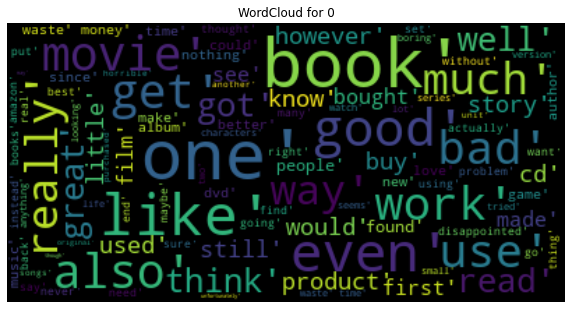

In [ ]:
word_cloud(list_tokenizer(rating_zero),0)

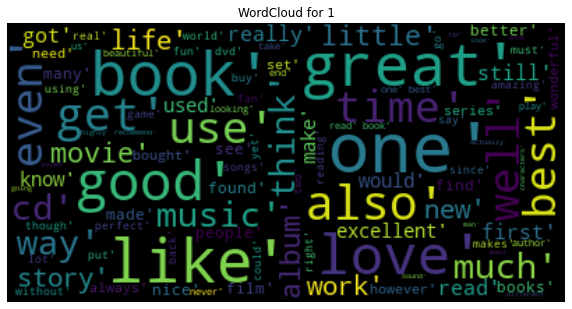

In [ ]:
word_cloud(list_tokenizer(rating_one),1)

In [ ]:
tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(data_sample_test['sample_clean'])

In [ ]:
testing_token = tokenizer.texts_to_sequences(data_sample_test['sample_clean'])

In [ ]:
y_test=np.array(data_sample_test['labels'])

In [ ]:
training_token = tokenizer.texts_to_sequences(data_sample_train['sample_clean'])
# testing_token = tokenizer.texts_to_sequences(test_text)

In [ ]:
x_train = pad_sequences(training_token, maxlen = 128, padding = 'post')

In [ ]:
x_test = pad_sequences(testing_token, maxlen = 128, padding = 'post')

In [ ]:
x_train

array([[1707,  126,   44, ...,    0,    0,    0],
       [1475, 3950, 2910, ...,    0,    0,    0],
       [   8,   74,  138, ...,    0,    0,    0],
       ...,
       [1967,   26,   77, ...,    0,    0,    0],
       [   5,  994,  240, ...,    0,    0,    0],
       [5778,   79,  816, ...,    0,    0,    0]], dtype=int32)

In [ ]:
x_test

array([[ 184,   30,    7, ...,    0,    0,    0],
       [2028, 4424,  104, ...,    0,    0,    0],
       [5627,   10,   12, ...,    0,    0,    0],
       ...,
       [1792,  770, 1523, ...,    0,    0,    0],
       [   4,  113,   39, ...,    0,    0,    0],
       [1165, 5192, 3872, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_train=np.array(data_sample_train['labels'])

In [ ]:
y_train

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
 model = tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 28, input_length = 128),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv1D(64, 5, activation = 'relu'),
        tf.keras.layers.MaxPooling1D(pool_size = 4),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

In [ ]:
model.compile('adam', 'binary_crossentropy', metrics = ['accuracy'], steps_per_execution=16)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 28)           280000    
                                                                 
 dropout (Dropout)           (None, 128, 28)           0         
                                                                 
 conv1d (Conv1D)             (None, 124, 64)           9024      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 64)           0         
 )                                                               
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
history = model.fit(x_train, y_train, batch_size = 16, epochs = 10,validation_data = (x_test, y_test), verbose = 2)

Epoch 1/10
6250/6250 - 55s - loss: 0.3204 - accuracy: 0.8590 - val_loss: 1.6231 - val_accuracy: 0.4993 - 55s/epoch - 9ms/step
Epoch 2/10
6250/6250 - 51s - loss: 0.2517 - accuracy: 0.8962 - val_loss: 1.6542 - val_accuracy: 0.4991 - 51s/epoch - 8ms/step
Epoch 3/10
6250/6250 - 52s - loss: 0.2168 - accuracy: 0.9132 - val_loss: 1.8614 - val_accuracy: 0.4984 - 52s/epoch - 8ms/step
Epoch 4/10
6250/6250 - 53s - loss: 0.1853 - accuracy: 0.9284 - val_loss: 2.0241 - val_accuracy: 0.4996 - 53s/epoch - 8ms/step
Epoch 5/10
6250/6250 - 54s - loss: 0.1581 - accuracy: 0.9396 - val_loss: 2.3016 - val_accuracy: 0.4993 - 54s/epoch - 9ms/step
Epoch 6/10
6250/6250 - 57s - loss: 0.1369 - accuracy: 0.9485 - val_loss: 2.8121 - val_accuracy: 0.4992 - 57s/epoch - 9ms/step
Epoch 7/10
6250/6250 - 54s - loss: 0.1198 - accuracy: 0.9544 - val_loss: 2.8691 - val_accuracy: 0.5002 - 54s/epoch - 9ms/step
Epoch 8/10
6250/6250 - 53s - loss: 0.1076 - accuracy: 0.9596 - val_loss: 3.0863 - val_accuracy: 0.4989 - 53s/epoch - 9

In [ ]:
model_lstm = tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 28, input_length = 128),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
model_lstm.compile('adam', 'binary_crossentropy', metrics = ['accuracy'], steps_per_execution=16)
model_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 28)           280000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               15616     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 304,065
Trainable params: 304,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model_lstm.fit(x_train, y_train, batch_size = 16, epochs = 5, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/5
6250/6250 - 291s - loss: 0.3029 - accuracy: 0.8710 - val_loss: 1.6383 - val_accuracy: 0.4976 - 291s/epoch - 47ms/step
Epoch 2/5
6250/6250 - 285s - loss: 0.2413 - accuracy: 0.9015 - val_loss: 1.8324 - val_accuracy: 0.4974 - 285s/epoch - 46ms/step
Epoch 3/5
6250/6250 - 285s - loss: 0.2121 - accuracy: 0.9144 - val_loss: 2.1132 - val_accuracy: 0.4984 - 285s/epoch - 46ms/step
Epoch 4/5
6250/6250 - 285s - loss: 0.1864 - accuracy: 0.9256 - val_loss: 1.8909 - val_accuracy: 0.4994 - 285s/epoch - 46ms/step
Epoch 5/5
6250/6250 - 293s - loss: 0.1592 - accuracy: 0.9384 - val_loss: 2.4980 - val_accuracy: 0.4992 - 293s/epoch - 47ms/step
